# Emissions Intensity Analysis - Aggregate

In [3]:
import numpy as np
import pandas as pd  # Note: need v 0.24.1
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set()
sns.set_context("talk", rc={"font.size":16,"axes.titlesize":24,"axes.labelsize":20,"axes.suptitlesize":30})

In [4]:
rawEmissions = pd.read_csv('annual_emissions_generation.csv')
endOfMetadata = list(rawEmissions.columns).index('2001')
rawEmissions.head()

,ORISPL_CODE,UNITID,NAME,STATE,FUEL,GAS,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,87,1,Escalante,NM,coal,CO2,1903127.550,1759793.438,1828577.008,1902621.244,...,2164308.835,2037049.242,2072636.857,1383242.059,1798755.138,1567634.466,1457199.782,1453830.000,836926.682,194330.800
1,87,1,Escalante,NM,coal,SO2,2594168.775,2383750.189,2367337.224,2455691.645,...,2616604.934,2423444.096,2513701.937,1578261.681,1901685.763,1463532.547,1693752.630,1797060.600,1009342.034,218623.800
2,87,1,Escalante,NM,coal,NOX,7177097.667,6939727.439,7090682.348,7471476.529,...,7214077.165,6222770.159,6770082.931,4529031.403,6071708.526,5157502.318,4900560.548,4873346.595,2857837.092,684156.694
3,87,1,Escalante,NM,coal,gen,1668686.500,1768206.470,1991751.690,1923467.860,...,1957540.310,1787165.070,1759866.520,1208594.400,1626496.000,1492632.210,1462298.150,1402342.000,791999.330,182870.000
4,113,1,Cholla,AZ,coal,CO2,846698.375,1039269.665,1023234.812,925585.810,...,957925.173,1157384.342,1064261.878,1019760.775,1032544.185,989512.421,801502.545,189501.681,404753.157,59755.363


## Aggregate emissions intensity

### By fuel type

In [5]:
gas = rawEmissions[rawEmissions['FUEL'] == 'NG']
print('gas units: ', gas.shape[0]/4)
coal = rawEmissions[rawEmissions['FUEL'] == 'coal']
print('coal units: ',coal.shape[0]/4)

gas units:  623.0
coal units:  102.0


In [14]:
def plotCO2I_byFuel(gas, coal):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(gas.index.values, gas.values, label='Gas')
    plt.plot(coal.index.values, coal.values, label='Coal')
    plt.xlabel('Year')
    plt.ylabel('CO2 intensity [tons CO2 / MWh]')
    plt.title('CO2 intensity in the Western Interconnection')
    plt.xticks(np.linspace(0, 18, 10), np.linspace(2001, 2019, 10, dtype=int))
    plt.legend()
    plt.show()
    return

In [15]:
coal_CO2sum = coal[coal['GAS'] == 'CO2'].iloc[:, endOfMetadata:].sum(axis=0)
coal_genSum = coal[coal['GAS'] == 'gen'].iloc[:, endOfMetadata:].sum(axis=0)
coal_CO2I = np.divide(coal_CO2sum, coal_genSum)

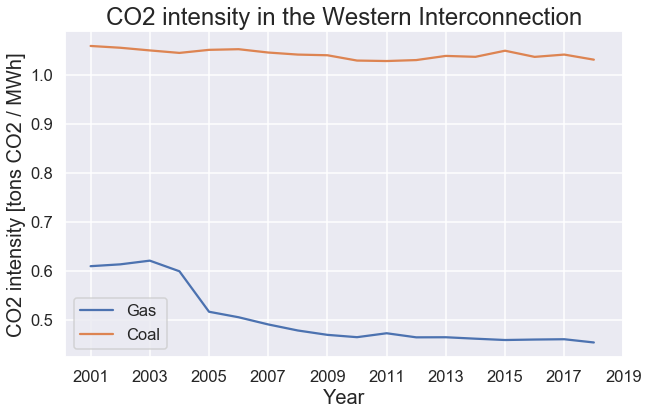

In [16]:
gas_CO2sum = gas[gas['GAS'] == 'CO2'].iloc[:, endOfMetadata:].sum(axis=0)
gas_genSum = gas[gas['GAS'] == 'gen'].iloc[:, endOfMetadata:].sum(axis=0)
gas_CO2I = np.divide(gas_CO2sum, gas_genSum)
plotCO2I_byFuel(gas_CO2I, coal_CO2I)

### By state

In [9]:
def plotByState(data, states, fuel):
    # states = states to plot
    # data = emissions intensity data
    fig = plt.figure(figsize=(12, 8))
    for state in states:
        stateCO2 = data[(data['STATE'] == state) & (data['GAS'] == 'CO2')].iloc[:, endOfMetadata:].sum(axis=0)
        stateGen = data[(data['STATE'] == state) & (data['GAS'] == 'gen')].iloc[:, endOfMetadata:].sum(axis=0)
        CO2I = np.divide(stateCO2, stateGen)
        plt.plot(CO2I.index.values, CO2I.values, label=state)
    plt.xlabel('Year')
    plt.ylabel('CO2 intensity [tons CO2 / MWh]')
    plt.title('CO2 intensity of {} generation in the Western Interconnection'.format(fuel))
    plt.xticks(np.linspace(0, 19, 10), np.linspace(2001, 2019, 10, dtype=int))
    plt.ylim([0.37, 1.23])
    plt.legend()
    plt.show()
    return

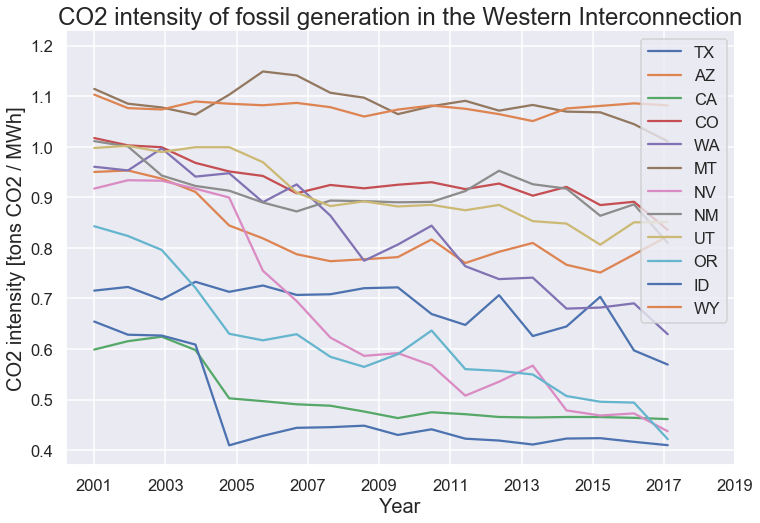

In [10]:
states = gas['STATE'].unique()
plotByState(rawEmissions, states, 'fossil')

### By state and fuel

In [11]:
gas.head()

,ORISPL_CODE,UNITID,NAME,STATE,FUEL,GAS,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
408,9,CTG-1,Copper Station,TX,NG,CO2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,9,CTG-1,Copper Station,TX,NG,SO2,NaN,NaN,NaN,NaN,...,131.449,146.253,512.040,385.986,338.067,386.461,285.456,336.140,139.530,NaN
410,9,CTG-1,Copper Station,TX,NG,NOX,NaN,NaN,NaN,NaN,...,47948.821,48633.971,200845.153,156782.380,128623.367,169519.114,125978.540,131073.700,65221.776,12263.780
411,9,CTG-1,Copper Station,TX,NG,gen,NaN,NaN,NaN,NaN,...,18720.130,16403.640,43347.000,41035.900,35503.020,40140.900,24884.460,33326.290,12963.870,1914.750
412,116,1,Ocotillo Power Plant,AZ,NG,CO2,261817.715,116852.704,54390.855,84180.573,...,19411.651,20226.546,33616.209,31481.460,38793.552,37691.543,41942.870,51119.986,51177.605,10837.183


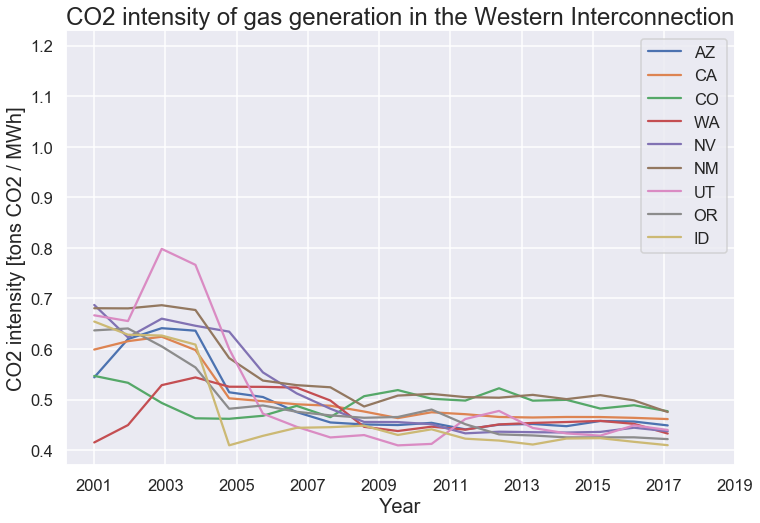

In [12]:
statesWithGas = ['AZ', 'CA', 'CO', 'WA', 'NV', 'NM', 'UT', 'OR', 'ID']
plotByState(gas, statesWithGas, 'gas')

C:\Users\austi\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


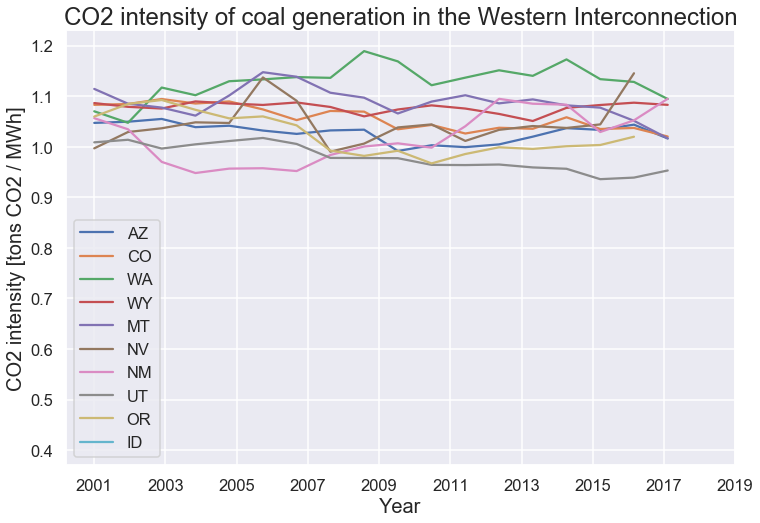

In [13]:
statesWithCoal = ['AZ', 'CO', 'WA', 'WY', 'MT', 'NV', 'NM', 'UT', 'OR', 'ID']
plotByState(coal, statesWithCoal, 'coal')

#### Why does it change so much? Are the plant efficiencies really changing that much?

#### Plot annual variance versus CO2I for each coal generating unit. What's the spatial correlaion between generator emissions intensity's relationship to variance? How much does that have to do with renewable penetration? With the type of renewable generation?